# Analysing the Application Dataset
__Trying to know the factors for Loan Default__

In [1]:
# Importing required packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data into a dataframe

In [4]:
# Importing dataset from directory.

application = pd.read_csv("application_data.csv")

#displaying first 5 rows of the application data set,

application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking for missing data

In [5]:
#defining a method for extracting missing values,

def missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [6]:
#extracting the  first 10 missing values of dataframe, 

missing(application).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


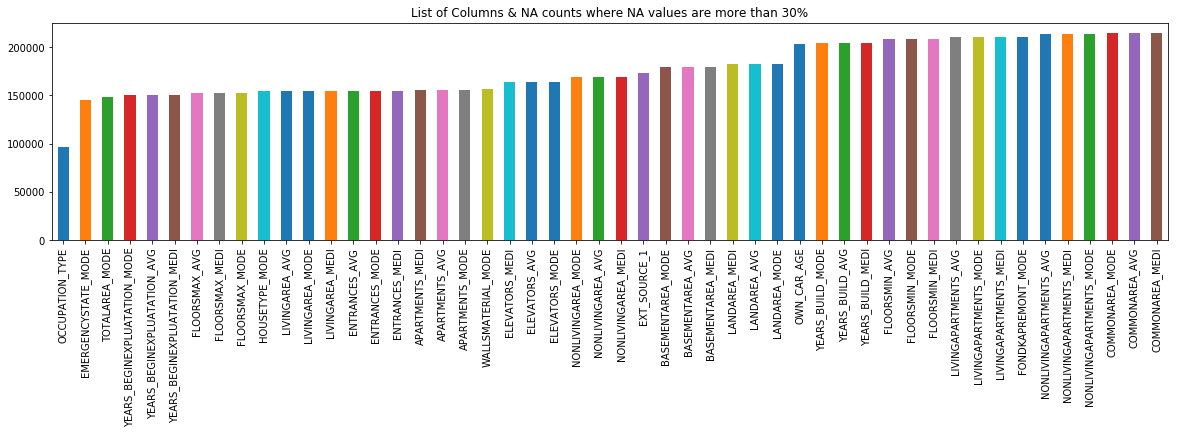

In [7]:
#Checking for columns with more than 30% missing values

NA_col = application.isnull().sum().sort_values()
NA_col = NA_col[NA_col.values >(0.3*len(application))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

__Insights: From the above plot, there are 20+ columns in the dataset where all the values are NA__

# Data Cleaning and Manipulation

In [8]:
# Dropping the columns where the Null % values is more than 30% and creating a new dataframe

application1 = application.loc[:,round(application.isnull().sum()/len(application)*100,2)<30]
application1.shape

(307511, 72)

In [9]:
#Extracting rows with more than 30% null value

NA_row=application1.transpose().isnull().sum()/len(application1)*100
NA_row[NA_row.values >(0.3*len(application1))]

Series([], dtype: float64)

In [10]:
# Creating a new Dataframe by dropping the unnecessary columns

application2 = application1.iloc[:, 0:16]

#First 5 rows of the new dataframe
application2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment


In [11]:
#size of the new dataframe
application2.shape

(307511, 16)

# Checking for data unbalance

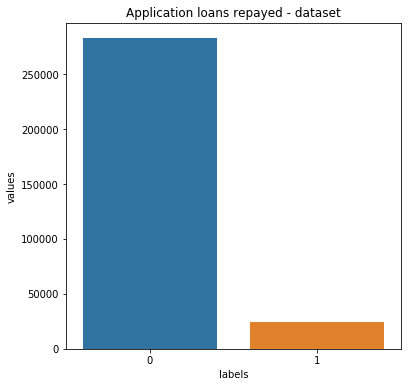

In [12]:
df = application2["TARGET"].value_counts()
df = pd.DataFrame({'labels': df.index,
                   'values': df.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

__Insights: From the below plot, it is clear that the loan defaulters are less when compared to those who repay the loan with a ratio 10:1__

# Univarite Analysis

In [13]:
#Checking for variables from the recent dataframe to analyse 

application2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE'],
      dtype='object')

In [14]:
def plot_graph (name,r):
    plt.figure(figsize=(8,6))
    sns.countplot(x=name, data=application2)
    plt.xlabel(name, fontsize=16)
    plt.ylabel('Number of Contract', fontsize=16)
    plt.title(name, fontsize=18)
    plt.xticks(rotation=r, fontsize=12)

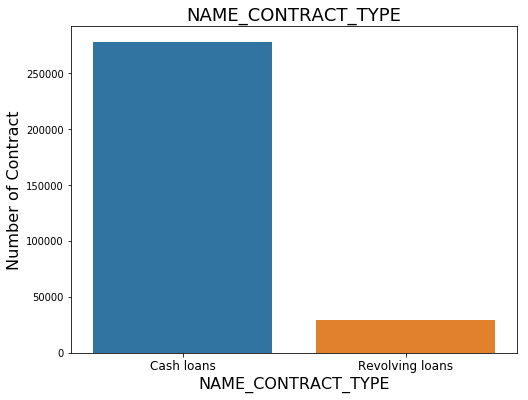

In [15]:
plot_graph('NAME_CONTRACT_TYPE',r=0)

__Insights: cash loans are considerably high when compared to the Revolving loans.__

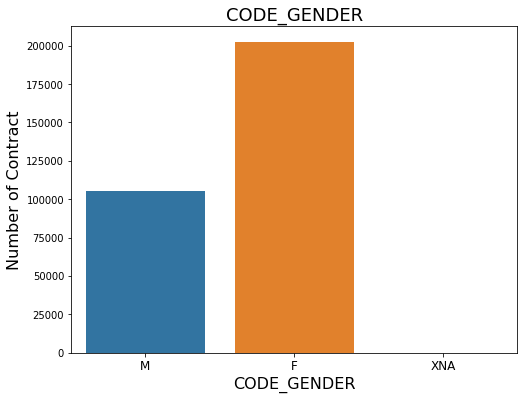

In [16]:
plot_graph('CODE_GENDER',r=0)

__Insights: Number of female clients is much higher compare to that of male clients.__

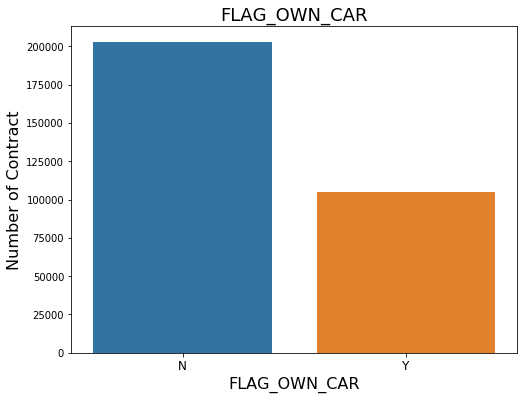

In [17]:
plot_graph('FLAG_OWN_CAR',r=0) 

__Insights:The clients that owns a car are almost half the count of those who don't own one.__

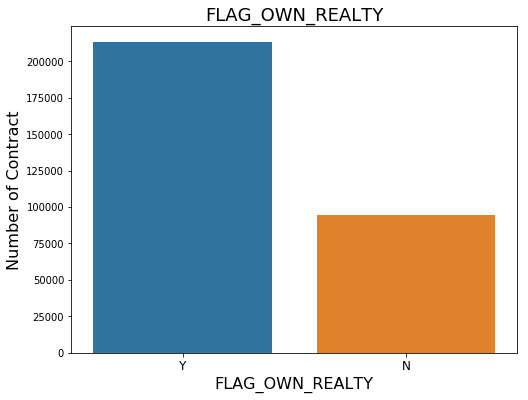

In [18]:
plot_graph('FLAG_OWN_REALTY',r=0)

__Insights:The clients that owns real estate are more to go for a loan__

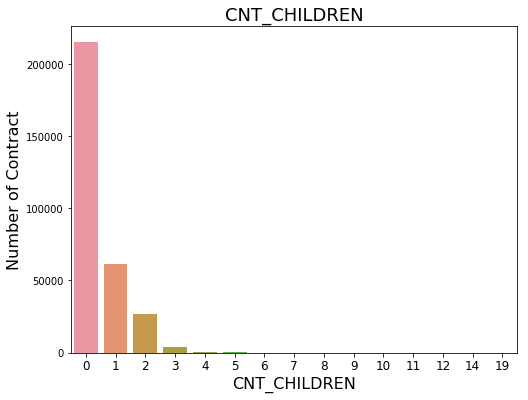

In [20]:
plot_graph('CNT_CHILDREN',r=0)

__Insights: Clients who aren’t parents yet subject themselves to loans rather than family type people!__

In [21]:
#Statistical summary of the dataframe,

a=pd.DataFrame(application2['AMT_INCOME_TOTAL'].describe())
a.loc['count'] = a.loc['count'].astype(int)
a.iloc[1:] = a.iloc[1:].applymap('{:.4f}'.format)
print(a)

      AMT_INCOME_TOTAL
count           307511
mean       168797.9193
std        237123.1463
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000


__Insights: From the above data we can tell that the max value is much higher (approx~550 times) compare to that of the 3rd quartile of the dataset.__

In [22]:
#Removing outliers (values from 99 to 100%)

q = application2['AMT_INCOME_TOTAL'].quantile(0.995)
application2 = application2[application2['AMT_INCOME_TOTAL'] < q]
a1=pd.DataFrame(application2['AMT_INCOME_TOTAL'].describe())
a1.loc['count'] = a1.loc['count'].astype(int)
a1.iloc[1:] = a1.iloc[1:].applymap('{:.4f}'.format)
print(a1)

      AMT_INCOME_TOTAL
count           305943
mean       164764.1491
std         81644.2477
min         25650.0000
25%        112500.0000
50%        144000.0000
75%        202500.0000
max        625500.0000


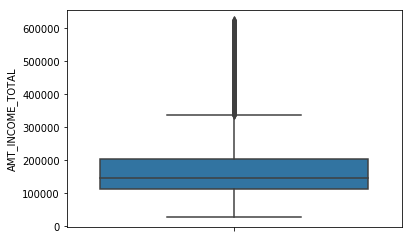

In [23]:
#using Box Plot
sns.boxplot(y=application2['AMT_INCOME_TOTAL'])
plt.show()

In [24]:
#creating bins for salary range

bins = [0, 112500, 144000, 202500, 625500]
slot = ['0-112500', '112500-144000', '144000-202500', '202500-625500']
application2['AMT_INCOME_TOTAL_RANGE'] = pd.cut(application2['AMT_INCOME_TOTAL'], bins, labels=slot)

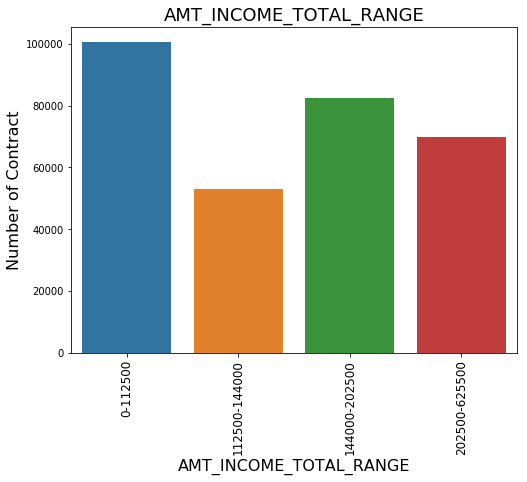

In [25]:
plot_graph('AMT_INCOME_TOTAL_RANGE',r=90)

__Insights: Most of the clients availing loan have a salary less than 112500.__

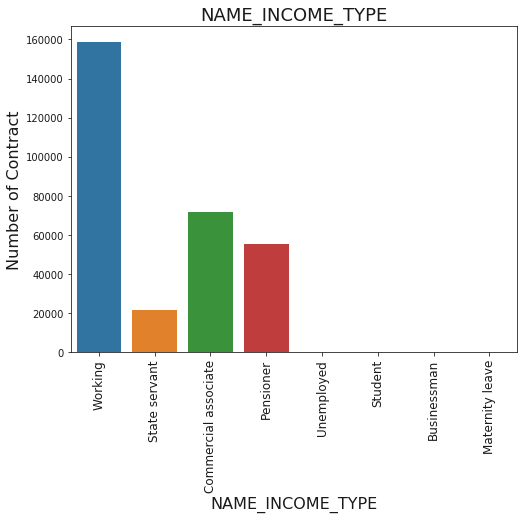

In [134]:
plot_graph('NAME_INCOME_TYPE',r=90)

__Insights: Most of the clients belongs to Working class follows by Commercial associate,Pensioner and State Servant.__

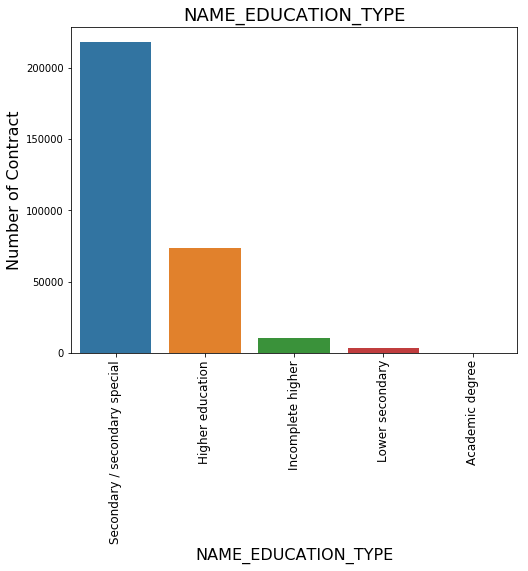

In [26]:
plot_graph('NAME_EDUCATION_TYPE',90)

__Insights: Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.__

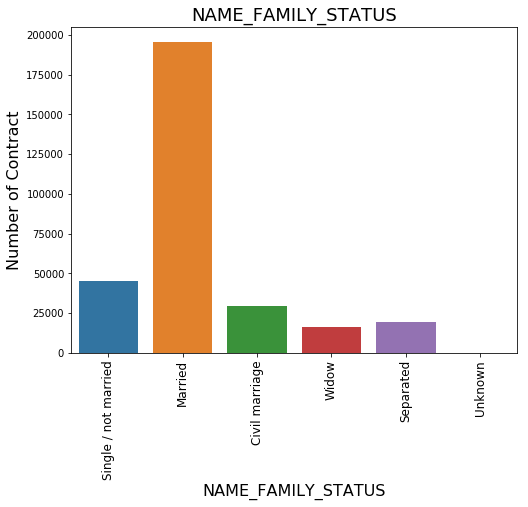

In [27]:
plot_graph('NAME_FAMILY_STATUS',90)

__Insights: Married people tend to take more loans than the other kind of people__

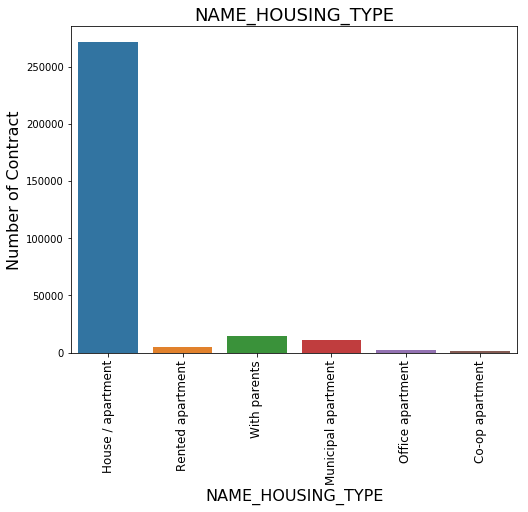

In [28]:
plot_graph('NAME_HOUSING_TYPE',90)

__Insights: Person who own House/apartment tends to take more loan than other clients__

__Amount Credit__

C:\Users\Kavitha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


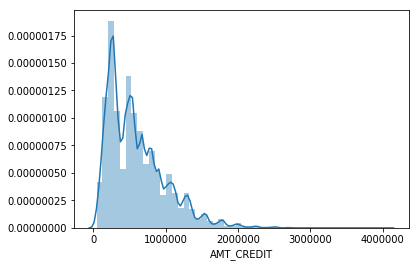

In [29]:
sns.distplot(application2['AMT_CREDIT'])
plt.show()

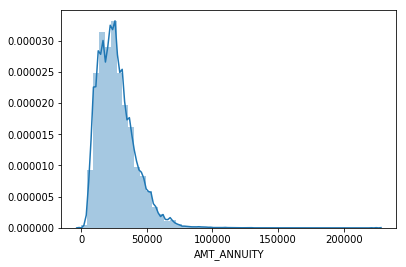

In [30]:
df_annuity=application2['AMT_ANNUITY'].fillna(0)
sns.distplot(df_annuity)
plt.show()

# Analysis - Previous Application Dataset

In [31]:
# Importing the dataset from the working directory.

previous_app = pd.read_csv("previous_application.csv")
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
missing(previous_app).head(10)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


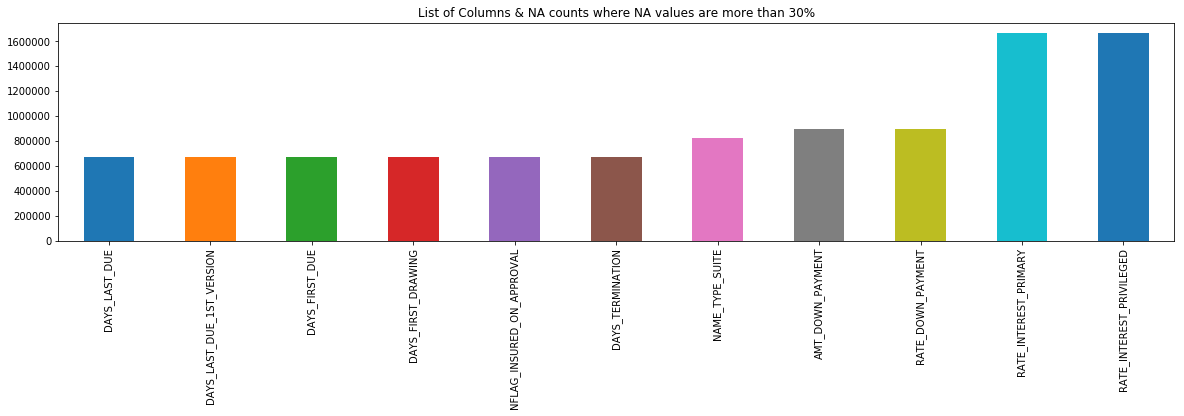

In [34]:
NA_col1 = previous_app.isnull().sum().sort_values()
NA_col1 = NA_col1[NA_col1.values >(0.3*len(previous_app))]
plt.figure(figsize=(20,4))
NA_col1.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [35]:
# Dropping the columns where the Null % values is more than 30%.

previous_app1 = previous_app.loc[:,round(previous_app.isnull().sum()/len(previous_app)*100,2)<30]
previous_app1.shape

(1670214, 26)

In [36]:
#extracting rows with more than 30% null value

NA_row1=previous_app1.transpose().isnull().sum()/len(previous_app1)*100
NA_row1[NA_row1.values >(0.3*len(previous_app1))]

Series([], dtype: float64)

In [159]:
previous_app1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [42]:
def plot_stat (name,r):
    plt.figure(figsize=(8,6))
    sns.countplot(x=name, data=previous_app1)
    plt.xlabel(name, fontsize=16)
    plt.ylabel('Number of Contract', fontsize=16)
    plt.title(name, fontsize=18)
    plt.xticks(rotation=r, fontsize=12)

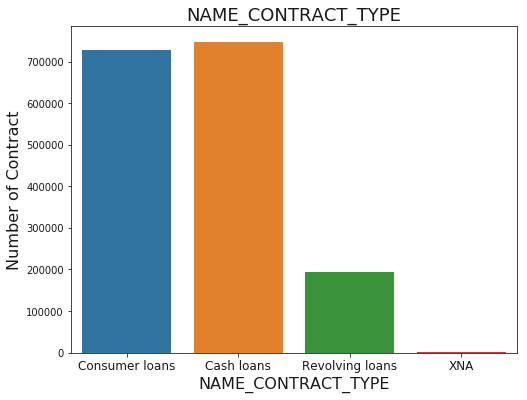

In [161]:
plot_stat ('NAME_CONTRACT_TYPE',0)

__Insights: There are three types of contract in the previous application data: Cash loans, Consumer loans, Revolving loans. Cash loans and Consumer loans are almost the same number (~700K) whilst Revolving loans are ~200K.__

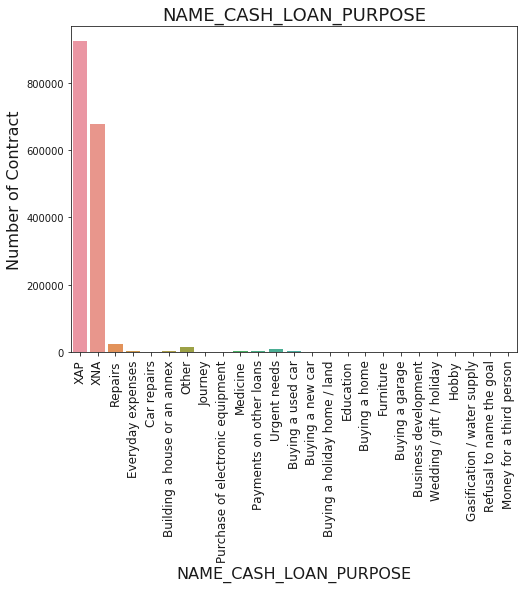

In [163]:
plot_stat ('NAME_CASH_LOAN_PURPOSE',90)

__Insights: Besides not identifed/not available categories, Repairs, Other, Urgent needs, medicine, building a house or an annex accounts for the largest number of contracts.__

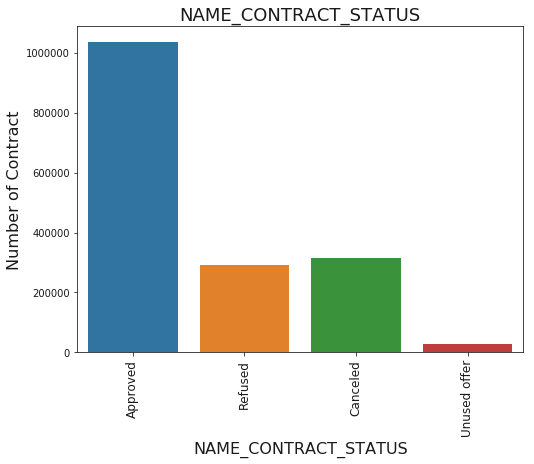

In [164]:
plot_stat('NAME_CONTRACT_STATUS',90)

__Insights: Most previous applications contract statuses are Approved (~1M), Canceled and Refused (~300K). There is status of Unused offer is very rare.__

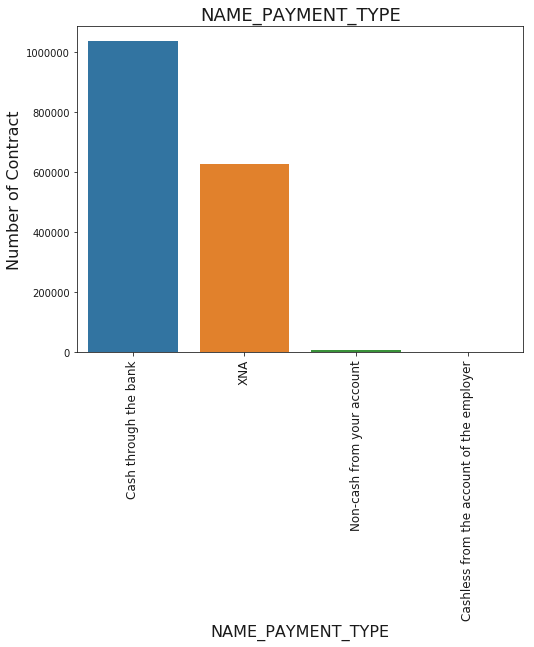

In [165]:
plot_stat('NAME_PAYMENT_TYPE',90)

__Insights: Most of the previous applications were paid with Cash through the bank (~1M). Payments using Non-cash from your account or Cashless from the account of the employer are much rare.__

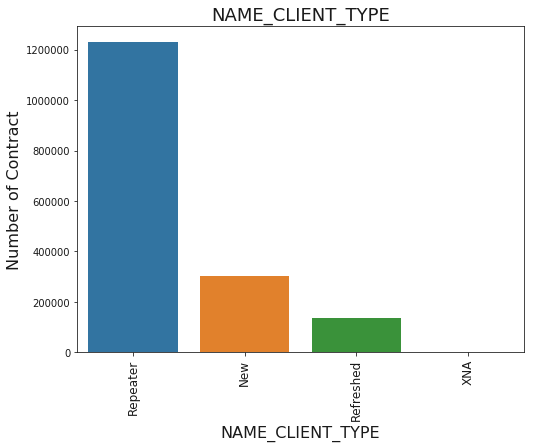

In [166]:
plot_stat('NAME_CLIENT_TYPE',90)

__Insight: Most of the previous applications have client type Repeater (>1M), just over 200K are New and ~100K are Refreshed.__ 

__Analysis on Previous Application Loan Amount.__

In [52]:
pa1=pd.DataFrame(previous_app1['AMT_APPLICATION'].describe())
pa1.loc['count'] = pa1.loc['count'].astype(int)
pa1.iloc[1:] = pa1.iloc[1:].applymap('{:.4f}'.format)
print(pa1)

      AMT_APPLICATION
count     1.67021e+06
mean      175233.8604
std       292779.7624
min            0.0000
25%        18720.0000
50%        71046.0000
75%       180360.0000
max      6905160.0000


__Insights: Maximum loan amount in previous application is about 40 times to that of mean value__ 

In [53]:
#Removing outliers,Remove Outliers (values from 99 to 100%)

q = previous_app1['AMT_APPLICATION'].quantile(0.995)
previous_app1 = previous_app1[previous_app1['AMT_APPLICATION'] < q]
pa1=pd.DataFrame(previous_app1['AMT_APPLICATION'].describe())
pa1.loc['count'] = pa1.loc['count'].astype(int)
pa1.iloc[1:] = pa1.iloc[1:].applymap('{:.4f}'.format)
print(pa1)

      AMT_APPLICATION
count     1.66169e+06
mean      165382.0669
std       257673.1529
min            0.0000
25%        18314.9212
50%        70101.0000
75%       180000.0000
max      1705500.0000


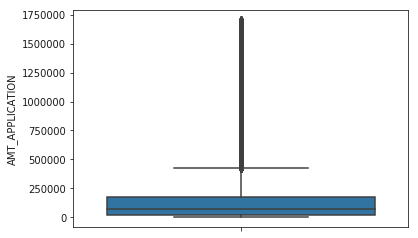

In [173]:
sns.boxplot(y=previous_app1['AMT_APPLICATION'])
plt.show()

In [54]:
bins = [0, 18500, 70000, 180000, 1705500]
slot = ['0-18500', '18500-70000', '70000-180000', '180000-1705500']
previous_app1['AMT_APPLICATION_RANGE']= pd.cut(previous_app1['AMT_APPLICATION'], bins, labels=slot)

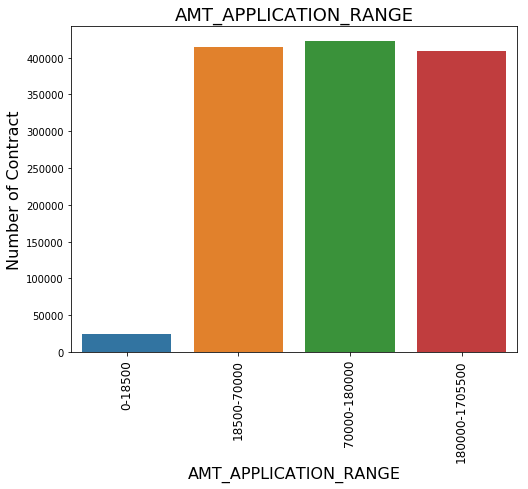

In [55]:
plot_stat('AMT_APPLICATION_RANGE',90)

__Insights: Most of the loan amount lies above 18500__

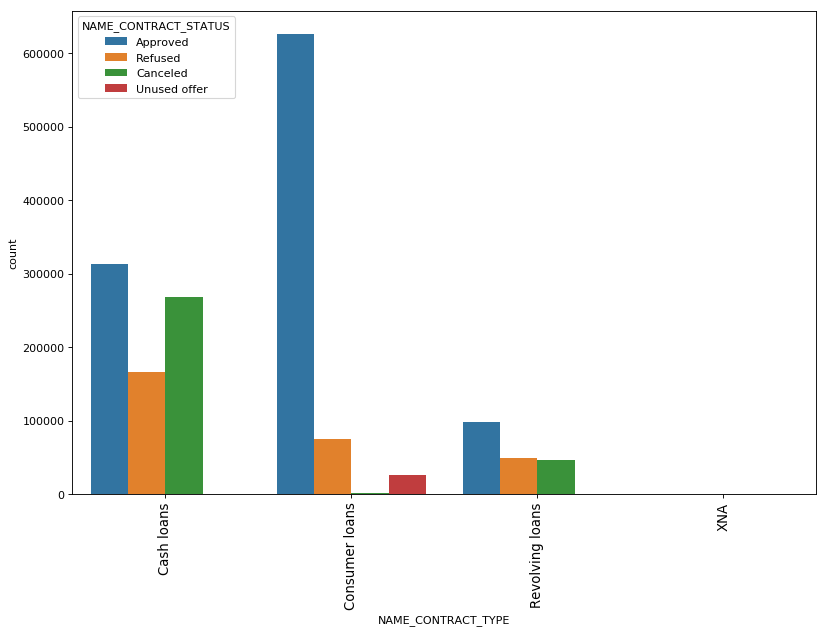

In [30]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =previous_app1, x= 'NAME_CONTRACT_TYPE', order=previous_app1['NAME_CONTRACT_TYPE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

__Insights: Most of the Consumer loans are getting approved followed by cash loans.__

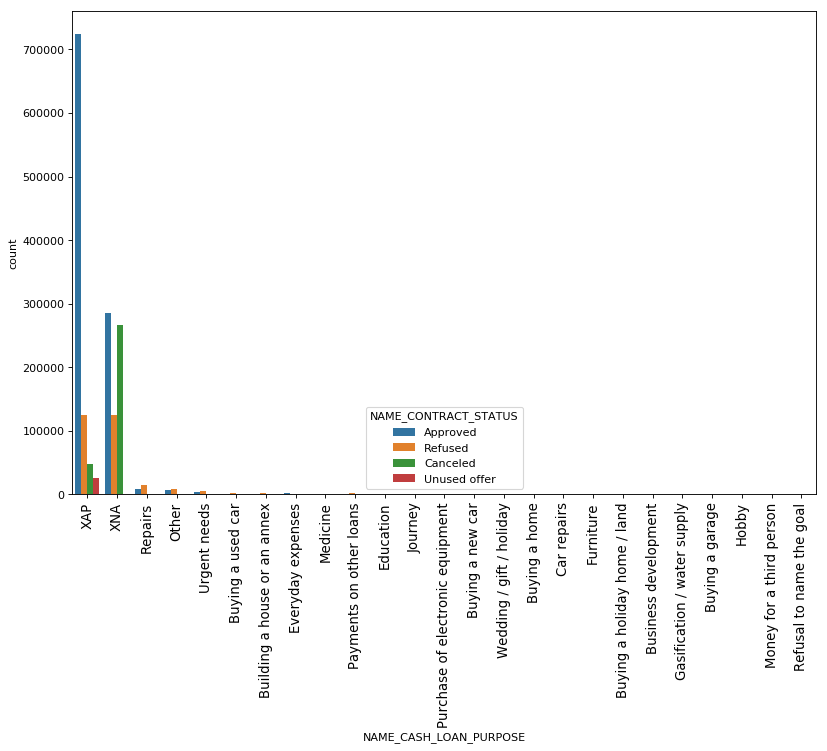

In [32]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =previous_app1, x= 'NAME_CASH_LOAN_PURPOSE', order=previous_app1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

__Insights: Most of the loans are getting approved without proper reasons.__

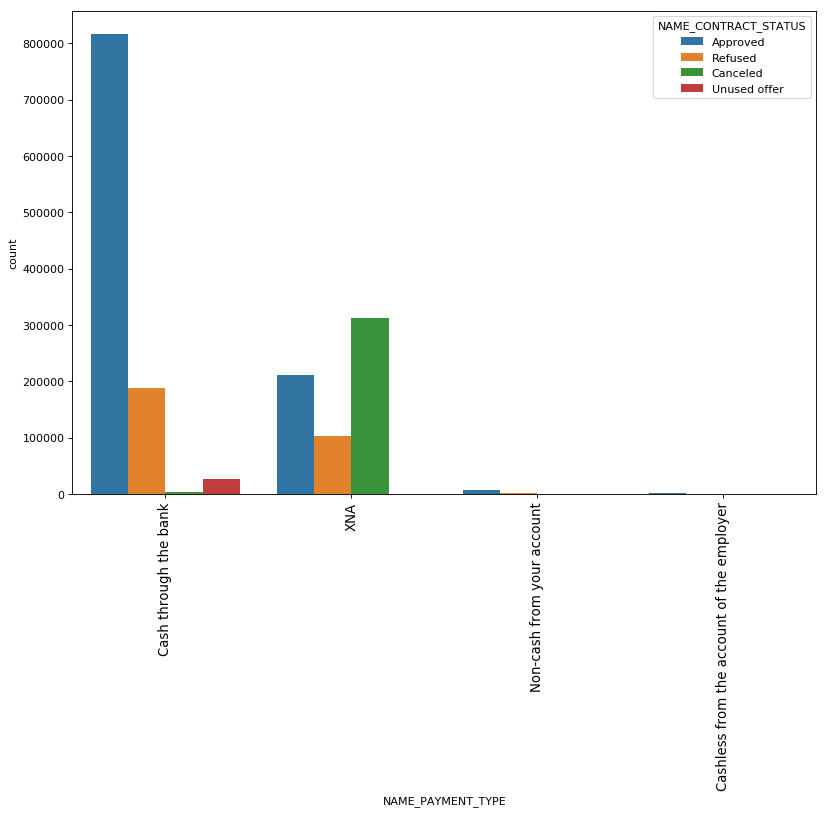

In [33]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =previous_app1, x= 'NAME_PAYMENT_TYPE', order=previous_app1['NAME_PAYMENT_TYPE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

__Insights: Most of the loans are approved where the loan amount is paid through cash from bank.__

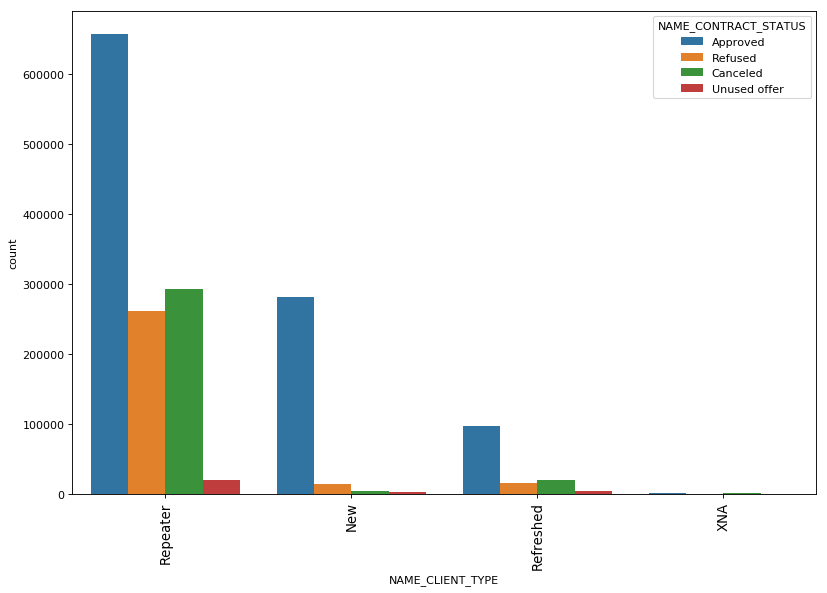

In [34]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =previous_app1, x= 'NAME_CLIENT_TYPE', order=previous_app1['NAME_CLIENT_TYPE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

__Insights: Most of loans are approved for existing Customers followed by New. From this we can also conclude the ratio of existing Customer to New Customer is low.__

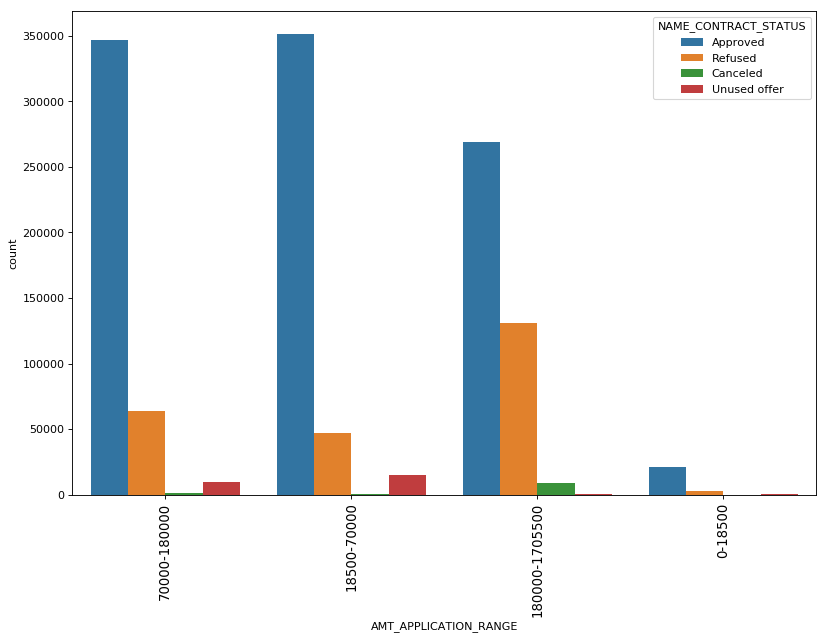

In [51]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data =previous_app1, x= 'AMT_APPLICATION_RANGE', order=previous_app1['AMT_APPLICATION_RANGE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90,fontsize=12)
plt.show()

__Insights: Loan with range in between 70000-180000 and 18500-70000 has more approve rate compare to that of 180000-1705500 range.__

In [37]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

application3 = application2.select_dtypes(include=numerics)
application4=application3.drop(columns=['SK_ID_CURR'])
application4.head(10)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,1,0,202500.0,406597.5,24700.5,351000.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0
2,0,0,67500.0,135000.0,6750.0,135000.0
3,0,0,135000.0,312682.5,29686.5,297000.0
4,0,0,121500.0,513000.0,21865.5,513000.0
5,0,0,99000.0,490495.5,27517.5,454500.0
6,0,1,171000.0,1560726.0,41301.0,1395000.0
7,0,0,360000.0,1530000.0,42075.0,1530000.0
8,0,0,112500.0,1019610.0,33826.5,913500.0
9,0,0,135000.0,405000.0,20250.0,405000.0


In [38]:
application_corr=application4.corr()
application_corr.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
TARGET,1.000000,0.019225,-0.021833,-0.029484,-0.011389,-0.038773
CNT_CHILDREN,0.019225,1.000000,0.027920,0.001195,0.020065,-0.002867
AMT_INCOME_TOTAL,-0.021833,0.027920,1.000000,0.400287,0.473827,0.404890
AMT_CREDIT,-0.029484,0.001195,0.400287,1.000000,0.771589,0.986845
AMT_ANNUITY,-0.011389,0.020065,0.473827,0.771589,1.000000,0.775638


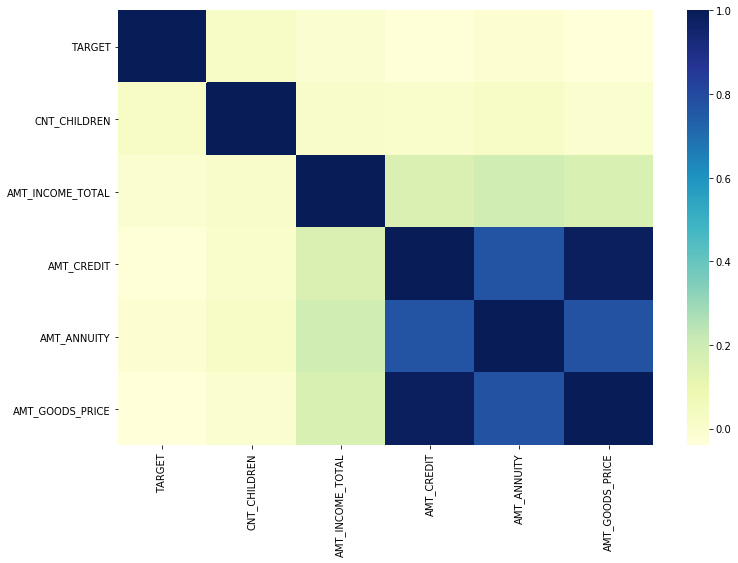

In [80]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(application_corr, cmap="YlGnBu")
plt.show()

__Insights: Amount credit,Amount annuity and Amount Goods Price are highly interrelated.__

In [39]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

previous_app2 = previous_app1.select_dtypes(include=numerics)
previous_app3=previous_app2.drop(columns=['SK_ID_CURR','SK_ID_PREV'])
previous_app3.head(10)

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
0,1730.430,17145.0,17145.0,17145.0,15,1,-73,35,12.0
1,25188.615,607500.0,679671.0,607500.0,11,1,-164,-1,36.0
2,15060.735,112500.0,136444.5,112500.0,11,1,-301,-1,12.0
3,47041.335,450000.0,470790.0,450000.0,7,1,-512,-1,12.0
4,31924.395,337500.0,404055.0,337500.0,9,1,-781,-1,24.0
5,23703.930,315000.0,340573.5,315000.0,8,1,-684,-1,18.0
6,NaN,0.0,0.0,NaN,11,1,-14,-1,NaN
7,NaN,0.0,0.0,NaN,7,1,-21,-1,NaN
8,NaN,0.0,0.0,NaN,15,1,-386,-1,NaN
9,NaN,0.0,0.0,NaN,15,1,-57,-1,NaN


In [85]:
previous_app_corr = previous_app3.corr()
previous_app_corr.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
AMT_ANNUITY,1.000000,0.801516,0.809390,0.815950,-0.039168,0.020486,0.280105,-0.014784,0.369552
AMT_APPLICATION,0.801516,1.000000,0.970135,0.999846,-0.018419,0.003096,0.135078,-0.007268,0.684528
AMT_CREDIT,0.809390,0.970135,1.000000,0.992325,-0.025606,-0.030231,0.134231,-0.009380,0.674138
AMT_GOODS_PRICE,0.815950,0.999846,0.992325,1.000000,-0.052812,-0.021038,0.306012,-0.016229,0.674552
HOUR_APPR_PROCESS_START,-0.039168,-0.018419,-0.025606,-0.052812,1.000000,0.005812,-0.040124,0.015716,-0.057215


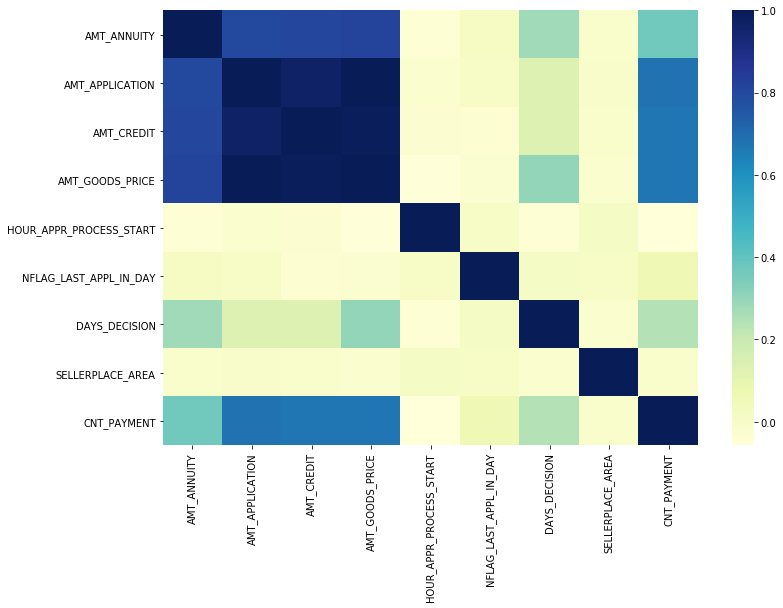

In [86]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(previous_app_corr, cmap="YlGnBu")
plt.show()